In [28]:
import time
from PIL import Image
import IPython.display as ipd
import numpy as np

def show(e, r = 2):
    im = Image.fromarray(e)
    im = im.resize(r*np.array(im.size))
    display(im)
SX, SY = 300, 300

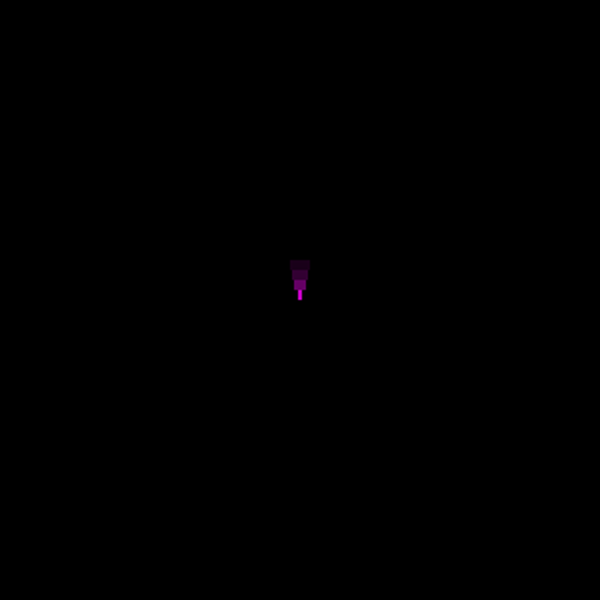

In [51]:
def make_bullet_e(x, y):
    bullet = np.zeros((SY, SX, 3), np.uint8)
    color = np.array([100, 0, 100])
    bullet[y+45:y+50, x-1:x+1] = color*2
    bullet[y+40:y+45, x-3:x+3] = color
    bullet[y+35:y+40, x-4:x+4] = color/2
    bullet[y+30:y+35, x-5:x+5] = color/4
    return bullet

b = make_bullet_e(150,100) 
show(b)

In [30]:
def pad(a, p):
    return np.pad(a, p + ((0,0),), mode='constant', constant_values=0)

def bullet_step_e(bullet):
    step = 2
    nb =  pad(bullet, ((step,0), (0,0)))[:-step,:,:]
    if nb.sum() == 0:
        return None
    return nb

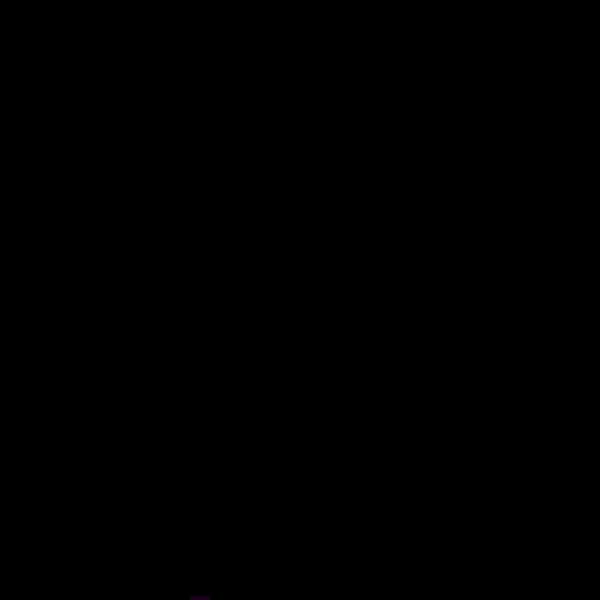

In [41]:
b = make_bullet_e(150,50) 
while b is not None: 
    b = bullet_step_e(b)
    if b is not None: 
        show(b)
    time.sleep(0.05)
    ipd.clear_output(wait=True)

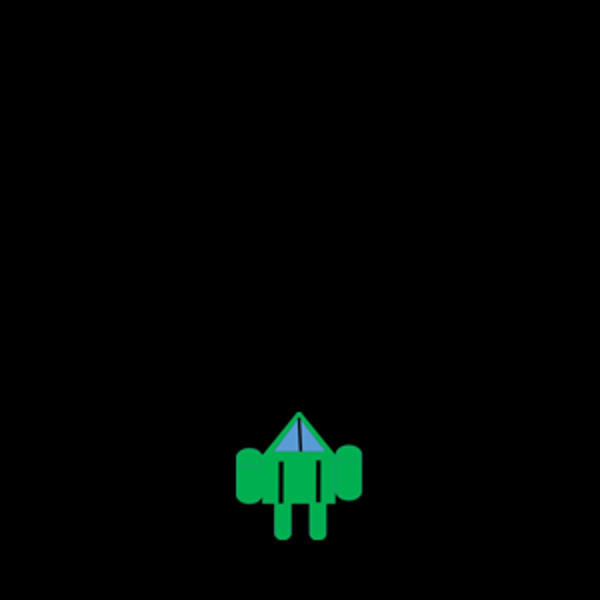

In [45]:
def make_fighter():
    FS = 64 
    obj = Image.open('images/my_fighter.jpg').resize((FS, FS))
    obj = np.array(obj)
    obj = pad(obj, ((SY-30-FS, 30), ((SX-FS)//2, (SX-FS)//2)))
    return obj
f = make_fighter()
show(f)

In [48]:
def is_hit_v1(obj1, obj2):
    nc = lambda e: np.count_nonzero(e)
    return nc(obj1) + nc(obj2) != nc(obj1 + obj2)

In [ ]:
b = make_bullet_e(150,50) 
while b is not None: 
    b = bullet_step_e(b)
    if b is not None: 
        show(b + f)
    print('is_hit:', is_hit_v1(b, f))
    if input() == 'q':
        break
    ipd.clear_output(wait=True)